In [1]:
!wget https://raw.githubusercontent.com/amulyalakku/Machine-Learning-Final-Project--Lakku-Amulya/main/train.csv

--2022-04-28 04:35:39--  https://raw.githubusercontent.com/amulyalakku/Machine-Learning-Final-Project--Lakku-Amulya/main/train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12193089 (12M) [text/plain]
Saving to: ‘train.csv.5’

train.csv.5         100%[===================>]  11.63M  --.-KB/s    in 0.06s   

2022-04-28 04:35:40 (192 MB/s) - ‘train.csv.5’ saved [12193089/12193089]



In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn import preprocessing

In [3]:
df = pd.read_csv('train.csv')

In [4]:
df.columns=[each.replace(" ","_") for each in df.columns]

In [5]:
# Drop unnecessary columns
df = df.drop('Unnamed:_0', axis=1)
# Check size of the data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 103904 non-null  int64  
 1   Gender                             103904 non-null  object 
 2   Customer_Type                      103904 non-null  object 
 3   Age                                103904 non-null  int64  
 4   Type_of_Travel                     103904 non-null  object 
 5   Class                              103904 non-null  object 
 6   Flight_Distance                    103904 non-null  int64  
 7   Inflight_wifi_service              103904 non-null  int64  
 8   Departure/Arrival_time_convenient  103904 non-null  int64  
 9   Ease_of_Online_booking             103904 non-null  int64  
 10  Gate_location                      103904 non-null  int64  
 11  Food_and_drink                     1039

In [6]:
df.describe()

,id,Age,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,Gate_location,Food_and_drink,Online_boarding,Seat_comfort,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,64924.210502,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,37463.812252,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32533.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,64856.500000,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,97368.250000,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


# **Univariate Data Analysis**

## **Categorical Variables**

In [7]:
def bar_plot(variable):
  var = df[variable]
  var_Value = var.value_counts()
    
  #visualize
  plt.figure(figsize=(9,3))
  plt.bar(var_Value.index,var_Value.values)
    
  plt.xlabel("Passengers Score")
  plt.ylabel("Frequency")
  plt.title(variable)
  plt.show()
  print("{}: \n {}".format(variable,var_Value))

In [8]:
category=["Inflight_wifi_service", "Departure/Arrival_time_convenient", "Ease_of_Online_booking", "Gate_location", "Food_and_drink", "Online_boarding", "Seat_comfort", "Inflight_entertainment", "On-board_service", "Leg_room_service", "Baggage_handling", "Checkin_service", "Inflight_service", "Cleanliness","Gender", "Customer_Type", "Type_of_Travel", "Class", "satisfaction"]

In [9]:
for c in category:
  print(c, "values :", df[c].unique())

Inflight_wifi_service values : [3 2 4 1 5 0]
Departure/Arrival_time_convenient values : [4 2 5 3 1 0]
Ease_of_Online_booking values : [3 2 5 4 1 0]
Gate_location values : [1 3 2 5 4 0]
Food_and_drink values : [5 1 2 4 3 0]
Online_boarding values : [3 5 2 1 4 0]
Seat_comfort values : [5 1 2 3 4 0]
Inflight_entertainment values : [5 1 2 3 4 0]
On-board_service values : [4 1 2 3 5 0]
Leg_room_service values : [3 5 4 2 1 0]
Baggage_handling values : [4 3 5 1 2]
Checkin_service values : [4 1 3 5 2 0]
Inflight_service values : [5 4 3 1 2 0]
Cleanliness values : [5 1 2 3 4 0]
Gender values : ['Male' 'Female']
Customer_Type values : ['Loyal Customer' 'disloyal Customer']
Type_of_Travel values : ['Personal Travel' 'Business travel']
Class values : ['Eco Plus' 'Business' 'Eco']
satisfaction values : ['neutral or dissatisfied' 'satisfied']


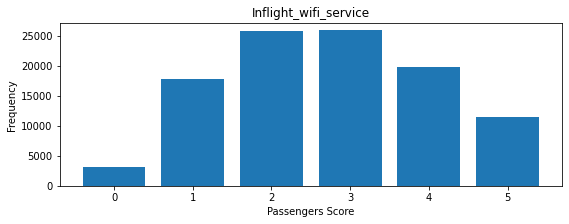

Inflight_wifi_service: 
 3    25868
2    25830
4    19794
1    17840
5    11469
0     3103
Name: Inflight_wifi_service, dtype: int64


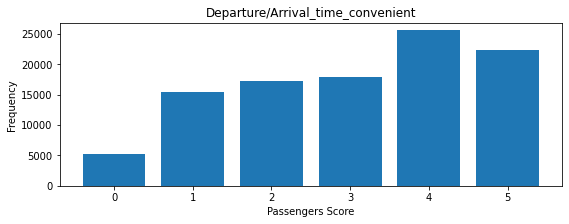

Departure/Arrival_time_convenient: 
 4    25546
5    22403
3    17966
2    17191
1    15498
0     5300
Name: Departure/Arrival_time_convenient, dtype: int64


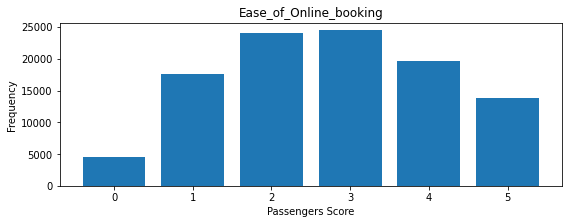

Ease_of_Online_booking: 
 3    24449
2    24021
4    19571
1    17525
5    13851
0     4487
Name: Ease_of_Online_booking, dtype: int64


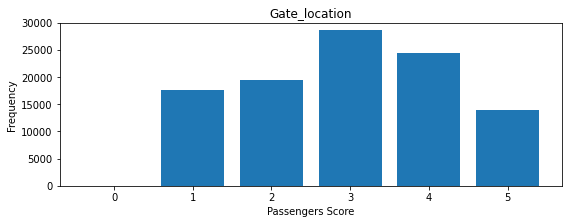

Gate_location: 
 3    28577
4    24426
2    19459
1    17562
5    13879
0        1
Name: Gate_location, dtype: int64


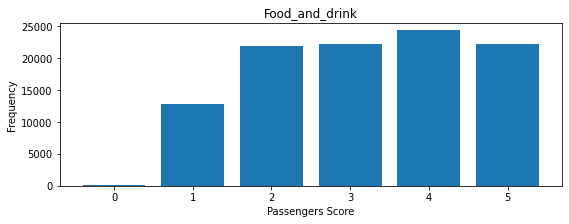

Food_and_drink: 
 4    24359
5    22313
3    22300
2    21988
1    12837
0      107
Name: Food_and_drink, dtype: int64


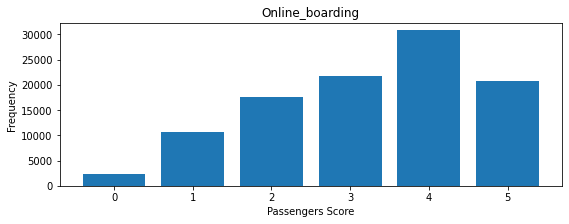

Online_boarding: 
 4    30762
3    21804
5    20713
2    17505
1    10692
0     2428
Name: Online_boarding, dtype: int64


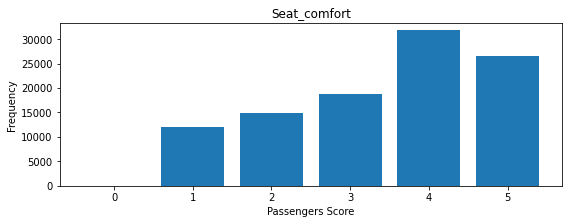

Seat_comfort: 
 4    31765
5    26470
3    18696
2    14897
1    12075
0        1
Name: Seat_comfort, dtype: int64


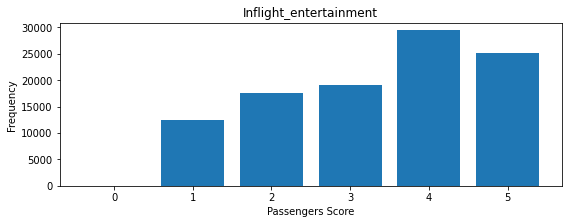

Inflight_entertainment: 
 4    29423
5    25213
3    19139
2    17637
1    12478
0       14
Name: Inflight_entertainment, dtype: int64


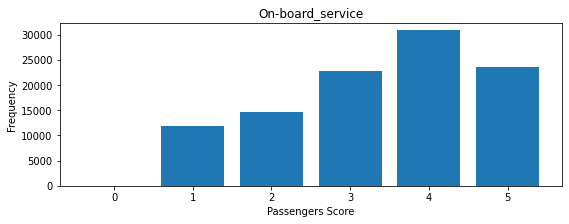

On-board_service: 
 4    30867
5    23648
3    22833
2    14681
1    11872
0        3
Name: On-board_service, dtype: int64


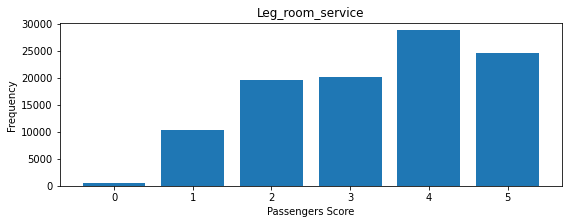

Leg_room_service: 
 4    28789
5    24667
3    20098
2    19525
1    10353
0      472
Name: Leg_room_service, dtype: int64


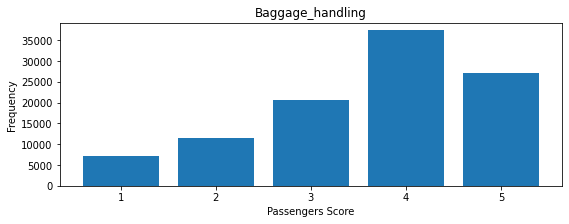

Baggage_handling: 
 4    37383
5    27131
3    20632
2    11521
1     7237
Name: Baggage_handling, dtype: int64


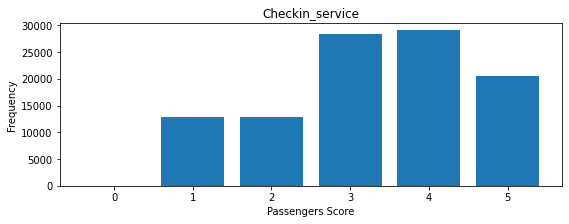

Checkin_service: 
 4    29055
3    28446
5    20619
2    12893
1    12890
0        1
Name: Checkin_service, dtype: int64


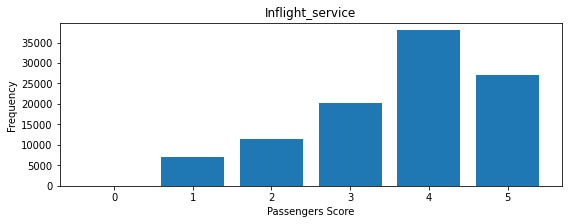

Inflight_service: 
 4    37945
5    27116
3    20299
2    11457
1     7084
0        3
Name: Inflight_service, dtype: int64


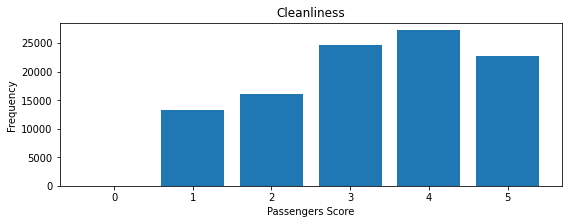

Cleanliness: 
 4    27179
3    24574
5    22689
2    16132
1    13318
0       12
Name: Cleanliness, dtype: int64


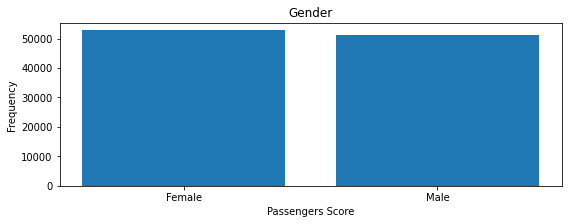

Gender: 
 Female    52727
Male      51177
Name: Gender, dtype: int64


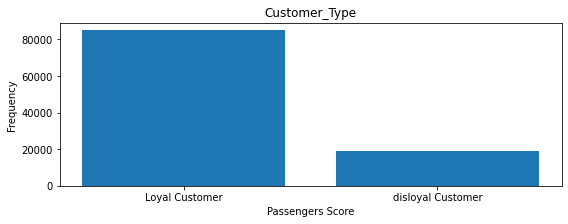

Customer_Type: 
 Loyal Customer       84923
disloyal Customer    18981
Name: Customer_Type, dtype: int64


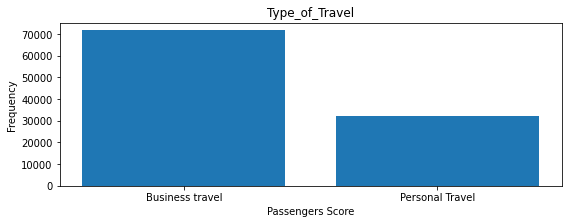

Type_of_Travel: 
 Business travel    71655
Personal Travel    32249
Name: Type_of_Travel, dtype: int64


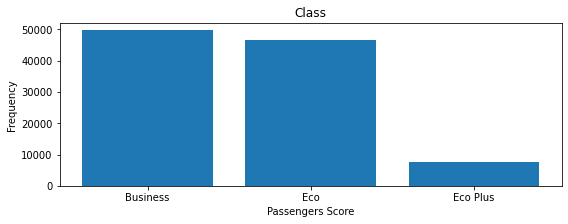

Class: 
 Business    49665
Eco         46745
Eco Plus     7494
Name: Class, dtype: int64


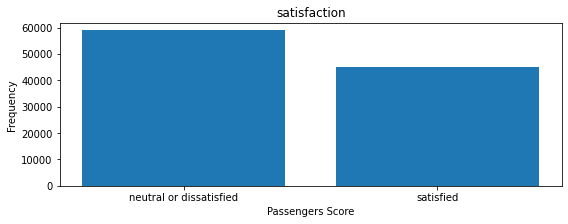

satisfaction: 
 neutral or dissatisfied    58879
satisfied                  45025
Name: satisfaction, dtype: int64


In [10]:
for c in category:
  bar_plot(c)

## **Numerical Variables**

In [11]:
def plot_hist(variable):
    plt.figure(figsize=(9,3))
    plt.hist(df[variable],bins=50)
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title("{} distribution with histogram".format(variable))
    plt.show()

In [12]:
numeric = ["id","Age", "Flight_Distance", "Departure_Delay_in_Minutes", "Arrival_Delay_in_Minutes"]

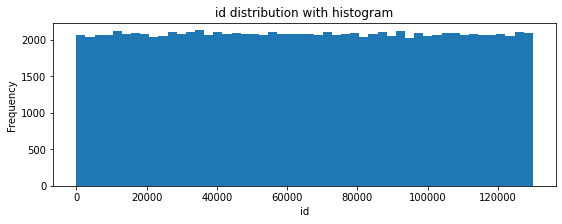

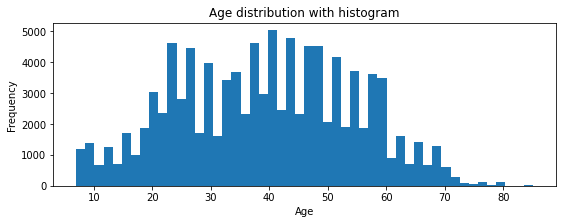

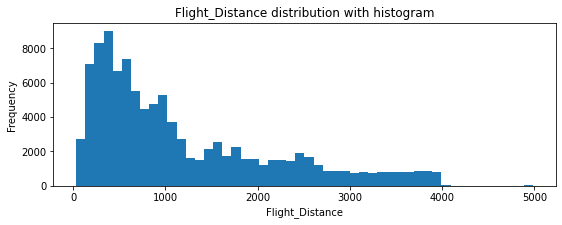

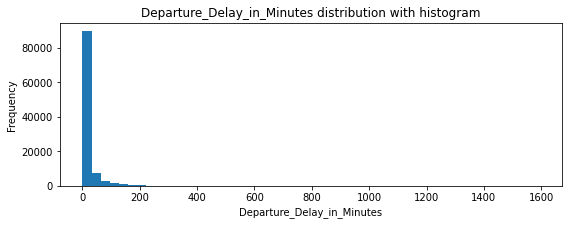

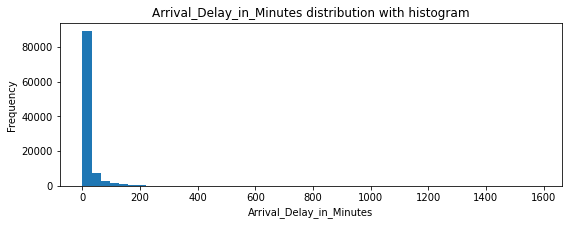

In [13]:
for n in numeric:
    plot_hist(n)

# **Analyzing the count of each column versus the target column**

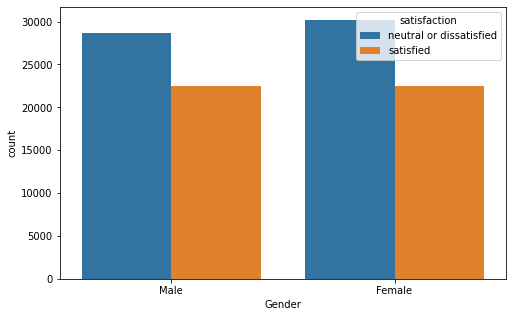

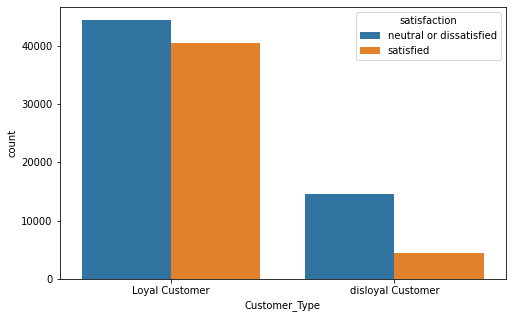

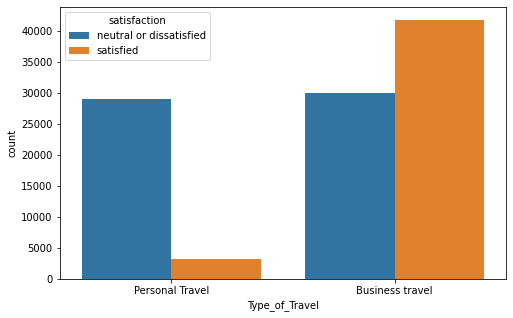

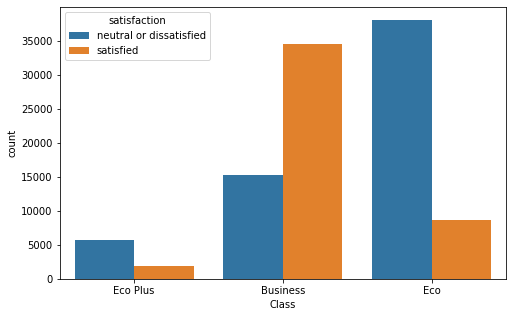

In [14]:
for col in df.select_dtypes(include = 'object'):
    if col != 'satisfaction':
        plt.figure(figsize = (8, 5))
        sns.countplot(x = col, data = df, hue = 'satisfaction')
        plt.show()

# **Insights**: 
### **From the plots it is understood that Business class customers are more satisfied.**

Grades with 4 and 5 tend to satisfy the customers.

In [21]:
remove_cols = ['Age', 'id', 'Departure/Arrival_time_convenient', 'Departure_Delay_in_Minutes', 'Arrival_Delay_in_Minutes', 'Flight_Distance']
grade_cols = set(df.select_dtypes(exclude = 'object').keys()) - set(remove_cols)

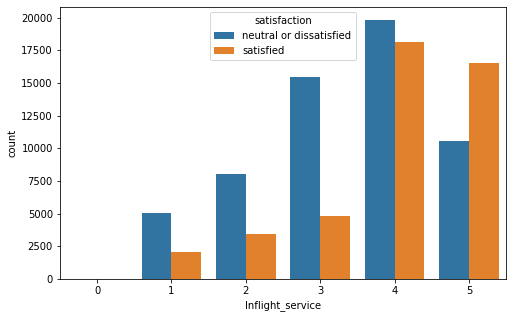

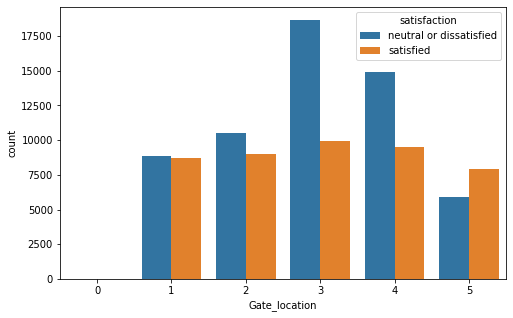

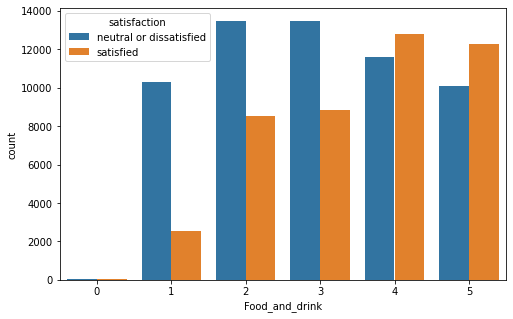

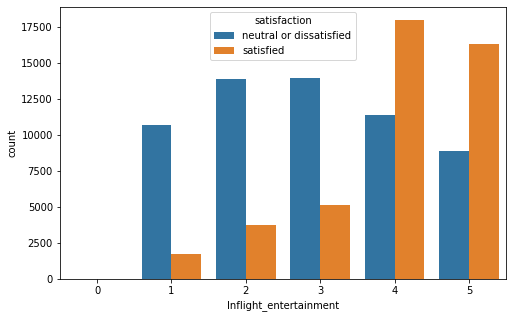

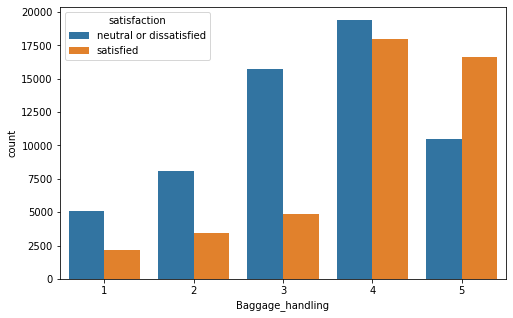

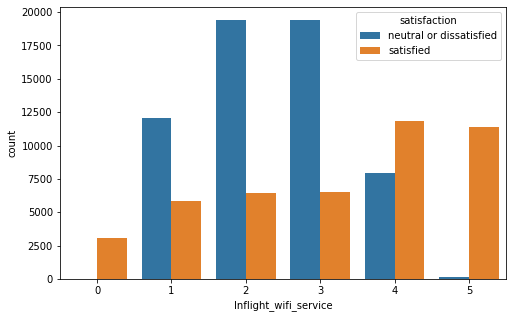

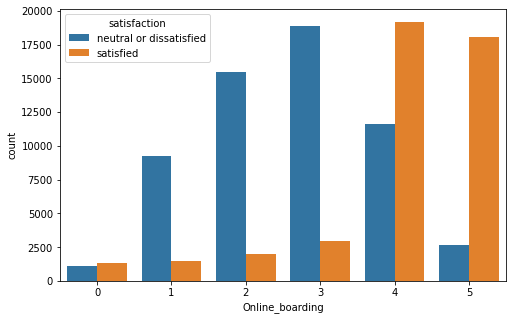

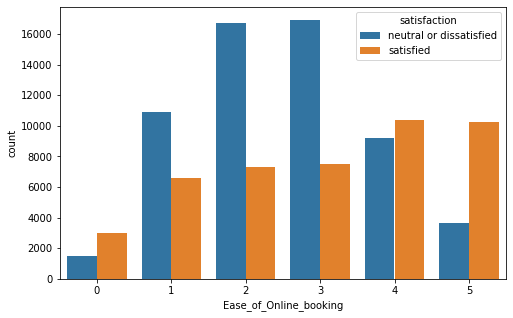

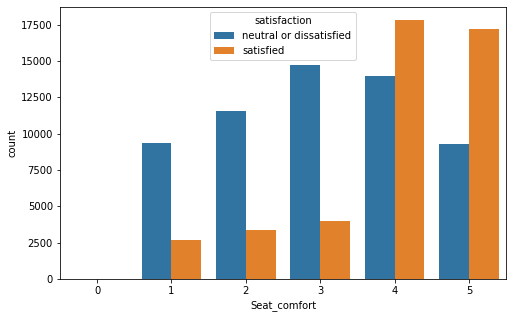

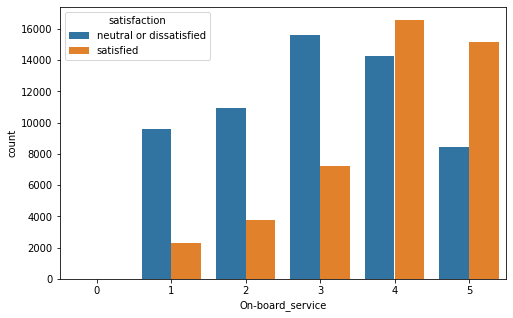

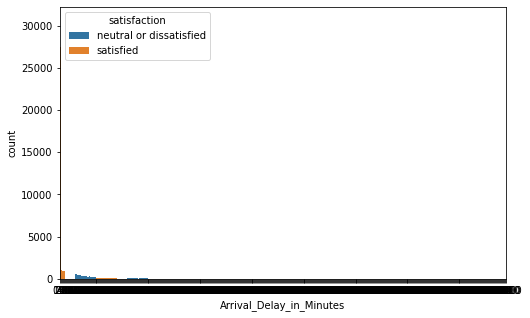

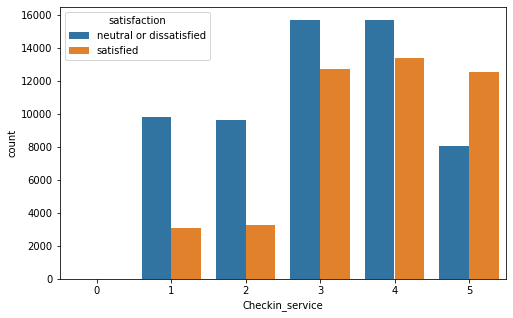

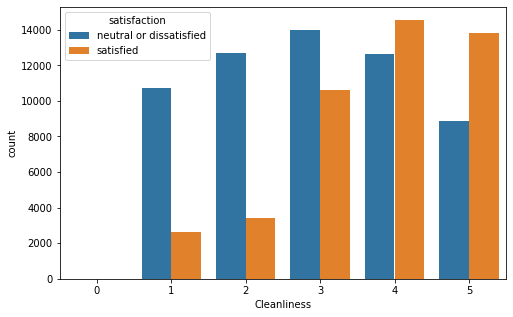

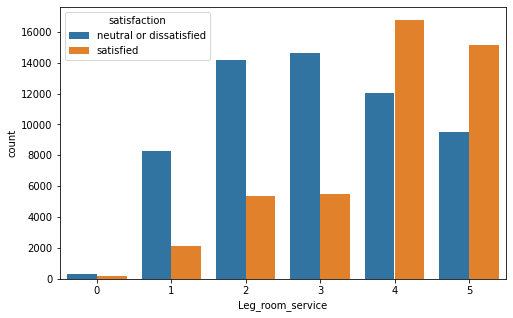

In [16]:
for col in grade_cols:
    if col != 'satisfaction':
        plt.figure(figsize = (8, 5))
        sns.countplot(x = col, data = df, hue = 'satisfaction')
        plt.show()

# **Insights**: 
## **From the plots, it can be understood that columns having grades 4 and 5 tend to satisfy majority of the customers.**



In [17]:
df["satisfaction"]=[1 if each=="satisfied" else 0 for each in df.satisfaction]

# **Gender --> satisfaction**

In [18]:
# Gender vs satisfaction
df[["Gender","satisfaction"]].groupby(["Gender"],as_index=False).mean().sort_values(by="satisfaction",ascending=False)

,Gender,satisfaction
1,Male,0.439475
0,Female,0.427371


/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3750: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


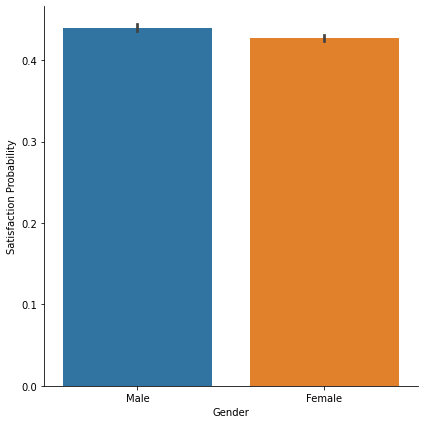

In [19]:
g=sns.catplot(x="Gender",y="satisfaction",data=df,kind="bar",size=6)
g.set_ylabels("Satisfaction Probability")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


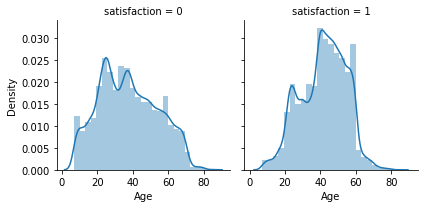

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


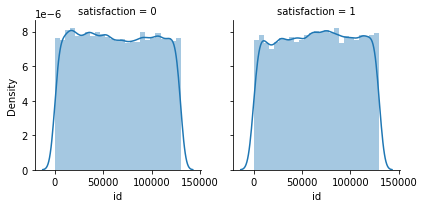

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


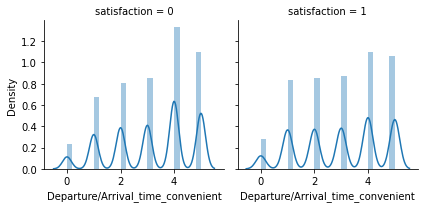

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


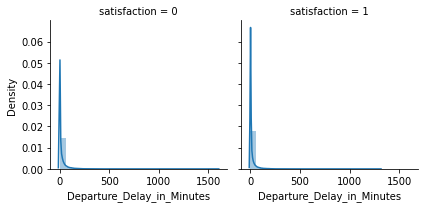

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


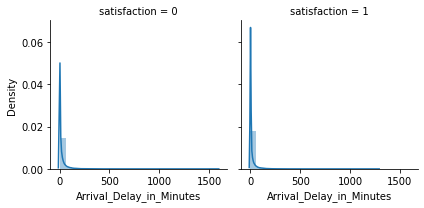

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


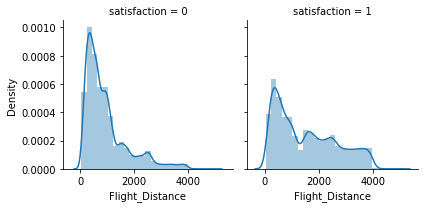

In [23]:
for col in remove_cols:
    if col != 'satisfaction':
        g= sns.FacetGrid(df,col="satisfaction")
        g.map(sns.distplot,col,bins=25)
        plt.show()

In [24]:
# Age vs satisfaction
df[["Age","satisfaction"]].groupby(["Age"],as_index=False).mean().sort_values(by="satisfaction",ascending=False)

,Age,satisfaction
34,41,0.607899
39,46,0.599819
44,51,0.597249
50,57,0.590102
45,52,0.586207
...,...,...
2,9,0.137283
63,70,0.136143
3,10,0.131772
1,8,0.107813


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


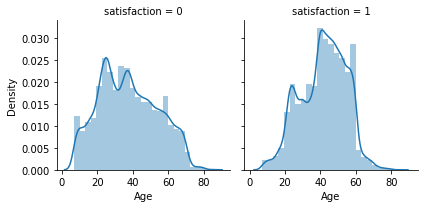

In [25]:
g= sns.FacetGrid(df,col="satisfaction")
g.map(sns.distplot,"Age",bins=25)
plt.show()
# 0=neutral or dissatisfied, 1=satisfied 

In [26]:
# Type_of_Travel vs satisfaction
df[["Type_of_Travel","satisfaction"]].groupby(["Type_of_Travel"],as_index=False).mean().sort_values(by="satisfaction",ascending=False)

,Type_of_Travel,satisfaction
0,Business travel,0.582597
1,Personal Travel,0.101678


/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


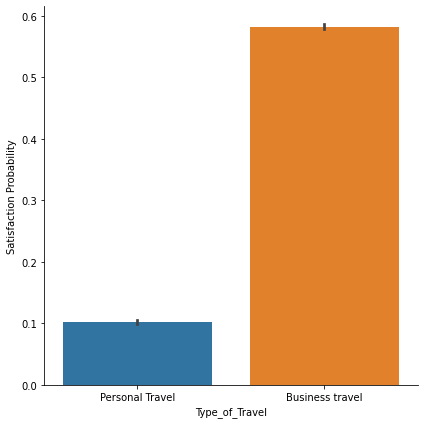

In [27]:
g=sns.factorplot(x="Type_of_Travel",y="satisfaction",data=df,kind="bar",size=6)
g.set_ylabels("Satisfaction Probability")
plt.show()

In [28]:
# Class vs satisfaction
df[["Class","satisfaction"]].groupby(["Class"],as_index=False).mean().sort_values(by="satisfaction",ascending=False)

,Class,satisfaction
0,Business,0.694251
2,Eco Plus,0.246064
1,Eco,0.186138


/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


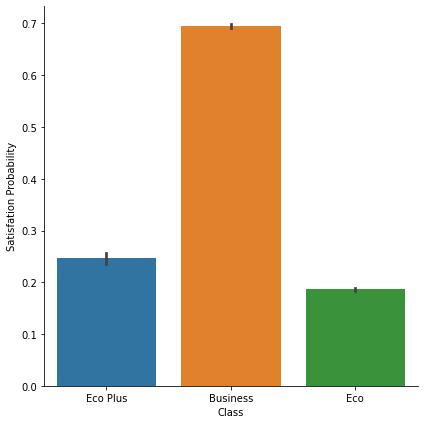

In [29]:
g=sns.factorplot(x="Class",y="satisfaction",data=df,kind="bar",size=6)
g.set_ylabels("Satisfation Probability")
plt.show()

In [30]:
# Customer_Type vs satisfaction
df[["Customer_Type","satisfaction"]].groupby(["Customer_Type"],as_index=False).mean().sort_values(by="satisfaction",ascending=False)

,Customer_Type,satisfaction
0,Loyal Customer,0.477291
1,disloyal Customer,0.236658


/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


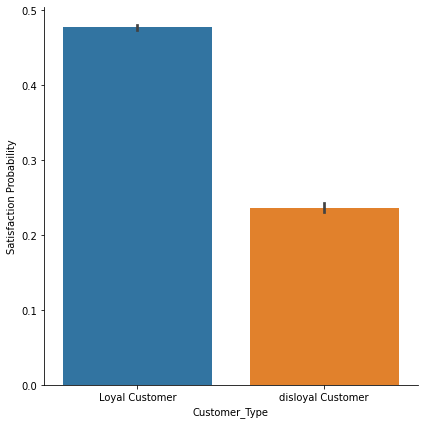

In [31]:
g=sns.factorplot(x="Customer_Type",y="satisfaction",data=df,kind="bar",size=6)
g.set_ylabels("Satisfaction Probability")
plt.show()

In [32]:
# Cleanliness vs satisfaction
df[["Cleanliness","satisfaction"]].groupby(["Cleanliness"],as_index=False).mean().sort_values(by="satisfaction",ascending=False)

,Cleanliness,satisfaction
5,5,0.608797
4,4,0.535340
3,3,0.431879
2,2,0.212993
1,1,0.196201
0,0,0.000000


/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


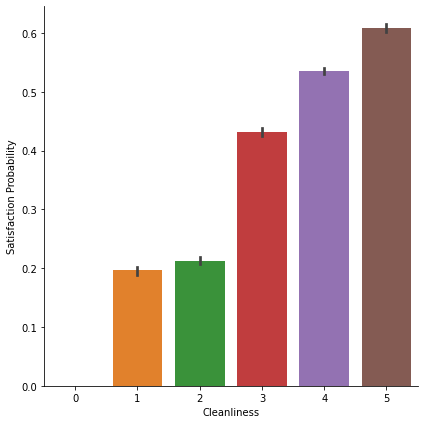

In [33]:
g=sns.factorplot(x="Cleanliness",y="satisfaction",data=df,kind="bar",size=6)
g.set_ylabels("Satisfaction Probability")
plt.show()

In [34]:
# Inflight_wifi_service vs satisfaction
df[["Inflight_wifi_service","satisfaction"]].groupby(["Inflight_wifi_service"],as_index=False).mean().sort_values(by="satisfaction",ascending=False)

,Inflight_wifi_service,satisfaction
0,0,0.997422
5,5,0.990758
4,4,0.598969
1,1,0.325448
3,3,0.250580
2,2,0.248664


/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


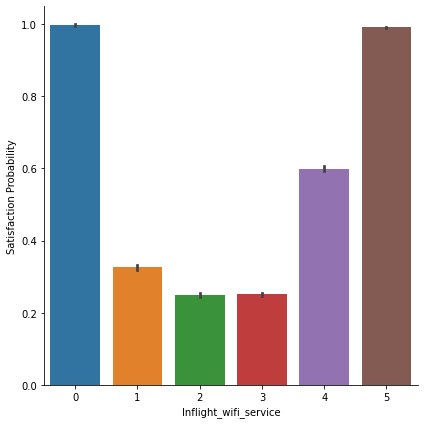

In [35]:
g=sns.factorplot(x="Inflight_wifi_service",y="satisfaction",data=df,kind="bar",size=6)
g.set_ylabels("Satisfaction Probability")
plt.show()

In [36]:
# Inflight_entertainment vs satisfaction
df[["Inflight_entertainment","satisfaction"]].groupby(["Inflight_entertainment"],as_index=False).mean().sort_values(by="satisfaction",ascending=False)

,Inflight_entertainment,satisfaction
5,5,0.648435
4,4,0.611766
3,3,0.270077
2,2,0.213302
1,1,0.139846
0,0,0.000000


/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


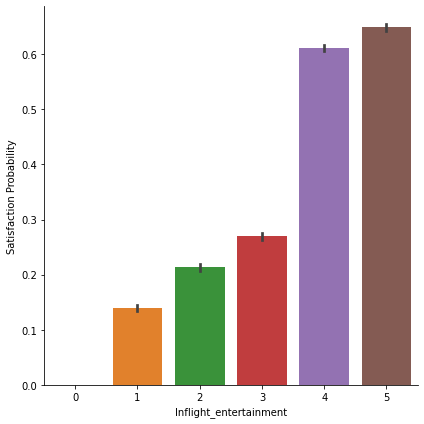

In [37]:
g=sns.factorplot(x="Inflight_entertainment",y="satisfaction",data=df,kind="bar",size=6)
g.set_ylabels("Satisfaction Probability")
plt.show()

In [38]:
# Food_and_drink vs satisfaction
df[["Food_and_drink","satisfaction"]].groupby(["Food_and_drink"],as_index=False).mean().sort_values(by="satisfaction",ascending=False)

,Food_and_drink,satisfaction
5,5,0.549007
4,4,0.524981
0,0,0.467290
3,3,0.396368
2,2,0.387939
1,1,0.200047


/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


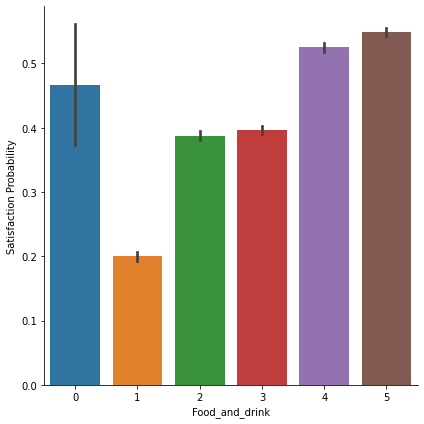

In [39]:
g=sns.factorplot(x="Food_and_drink",y="satisfaction",data=df,kind="bar",size=6)
g.set_ylabels("Satisfaction Probability")
plt.show()

In [40]:
# Seat_comfort vs satisfaction
df[["Seat_comfort","satisfaction"]].groupby(["Seat_comfort"],as_index=False).mean().sort_values(by="satisfaction",ascending=False)

,Seat_comfort,satisfaction
5,5,0.650208
4,4,0.561152
2,2,0.224139
1,1,0.223188
3,3,0.211543
0,0,0.000000


/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


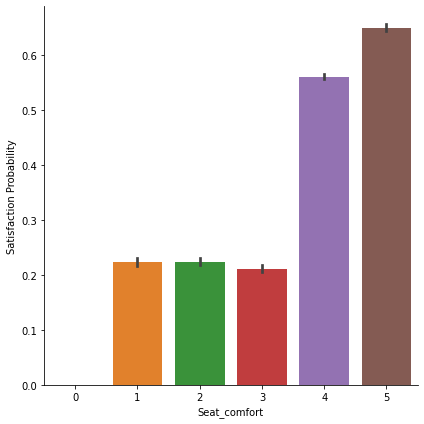

In [41]:
g=sns.factorplot(x="Seat_comfort",y="satisfaction",data=df,kind="bar",size=6)
g.set_ylabels("Satisfaction Probability")
plt.show()

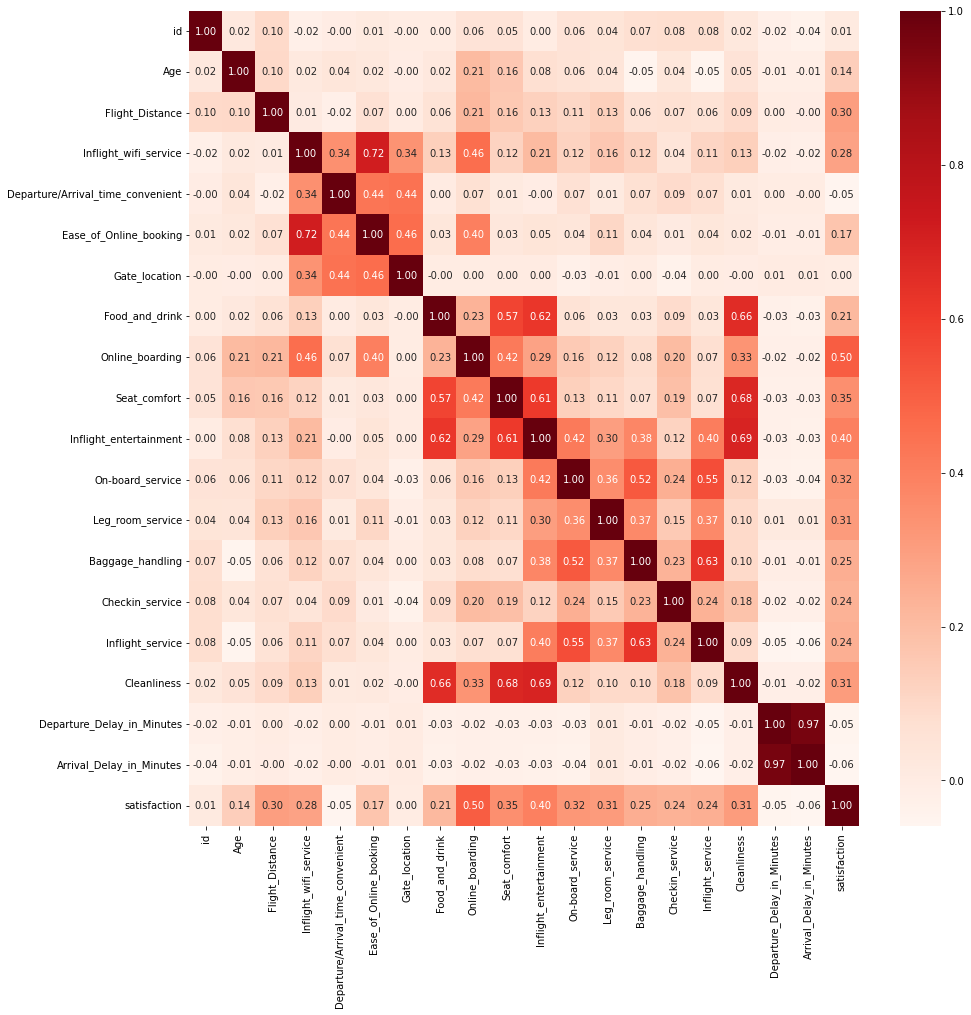

In [42]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),cmap='Reds',annot=True,fmt=".2f")
plt.show()

# We select features that has relatively high correlation score (greater than 0.3) with satisfaction in the last column.